# Vision part of the Mobile Robotics project

## Notes about the project and innput advancement

Dimensions of the thymio : 11 cm x 11.2 cm x 5.3 cm (https://wiki.thymio.org/fr:thymiospecifications).

I'll then choose 12-cm side squares for the start and end of the thymio, respectively green and blue.

## Imports

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

### Loading image

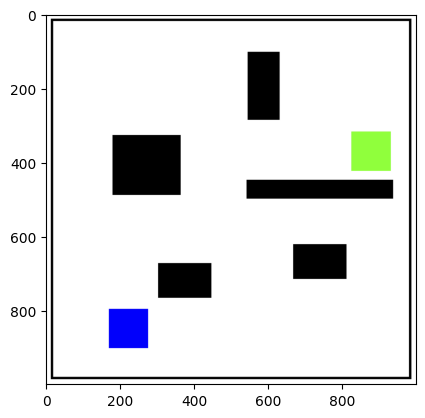

In [37]:
# Load the image
image = cv2.imread('map_mobile_robotics2.jpeg')

#Resize this image to 1mx1m
image = cv2.resize(image, (1000, 1000))

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.show()

## Preprocessing

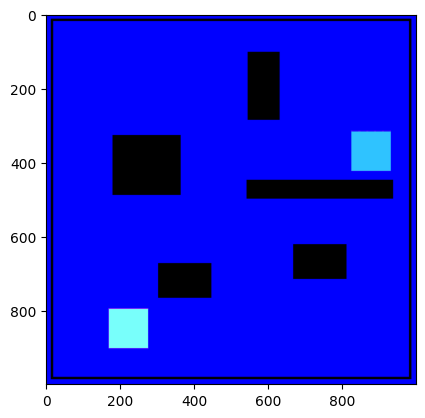

In [38]:
# Convert the image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Display the image
plt.imshow(hsv)
plt.show()

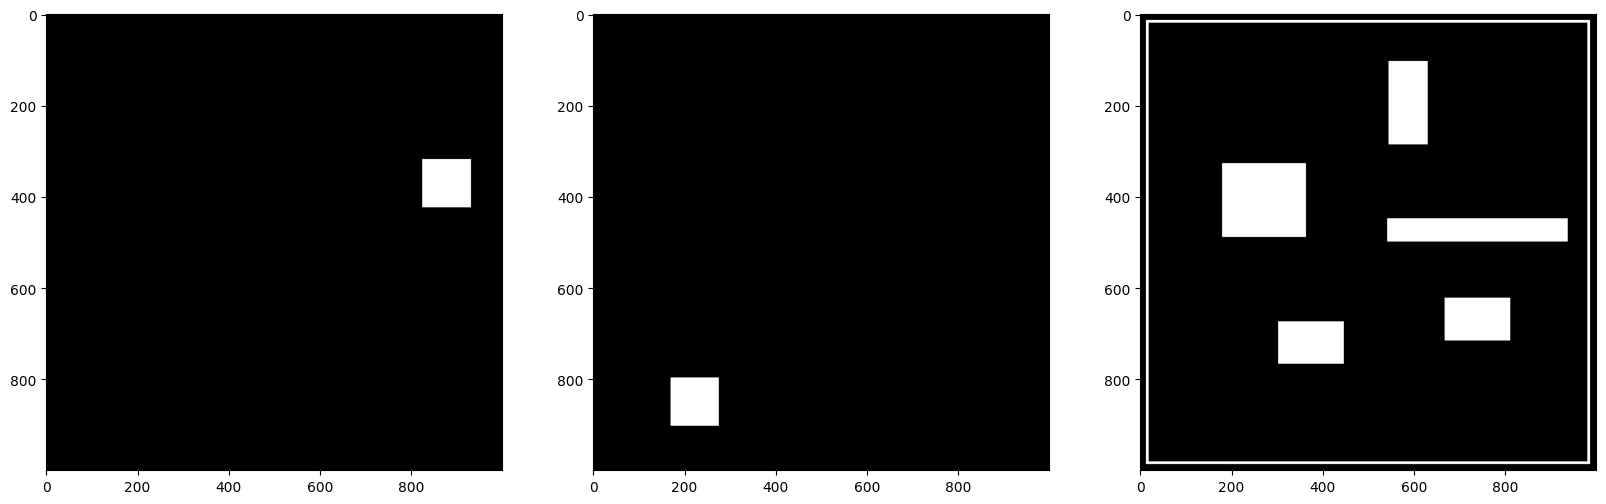

In [39]:
# Define color ranges for green squares
green_lower = np.array([35, 100, 100])
green_upper = np.array([85, 255, 255])
green_mask = cv2.inRange(hsv, green_lower, green_upper)

# Define color ranges for blue squares
blue_lower = np.array([100, 100, 100])
blue_upper = np.array([140, 255, 255])
blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)

# Define color ranges for black squares or rectangles
black_lower = np.array([0, 0, 0])
black_upper = np.array([180, 255, 30])
black_mask = cv2.inRange(hsv, black_lower, black_upper)

#display the 3 masks
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(green_mask, cmap="gray")
plt.subplot(132)
plt.imshow(blue_mask, cmap="gray")
plt.subplot(133)
plt.imshow(black_mask, cmap="gray")
plt.show()


In [40]:
# Find contours for each colour
green_contours, _ = cv2.findContours(green_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
black_contours, _ = cv2.findContours(black_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
black_contours = black_contours[2:] # Exclude the map contour

# Display the variables
print("Green contours: ", len(green_contours))
print("Blue contours: ", len(blue_contours))
print("Black contours: ", len(black_contours))

Green contours:  1
Blue contours:  1
Black contours:  5


In [41]:
# Draw contours on the original image
#Code for orange

cv2.drawContours(image, black_contours, -1, (0, 255, 255), 3);  # Red       color for   black   squares
cv2.drawContours(image, green_contours, -1, (0, 165, 255), 3);  # Orange    color for   green   squares
cv2.drawContours(image, blue_contours, -1, (255, 0, 0), 3);     # Yellow    color for   blue    squares


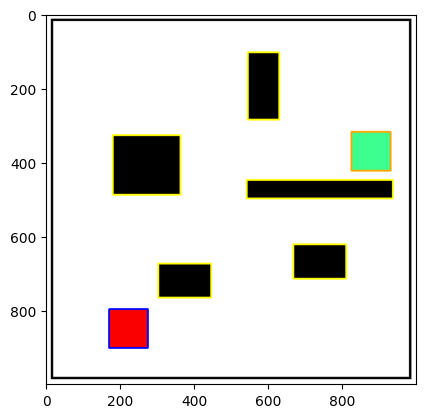

In [42]:
# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Approximate contours to polygons and detect quadrilaterals for each color
for color_contours in [blue_contours, green_contours, black_contours]:
   for cnt in color_contours:
       rectangle = cv2.minAreaRect(cnt)
       (center_x, center_y), (width, height), angle = rectangle
       if abs(width - height) < 400:
           print(f'Quadrilateral found at coordinates: {center_x}, {center_y}')


In [43]:
for cnt in blue_contours:
 approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
 if len(approx) == 4:
     x, y, w, h = cv2.boundingRect(cnt)
     print(f'Blue square found at coordinates: {x}, {y}')

for cnt in green_contours:
 approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
 if len(approx) == 4:
     x, y, w, h = cv2.boundingRect(cnt)
     print(f'Green square found at coordinates: {x}, {y}')

for cnt in black_contours:
 approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
 if len(approx) == 4:
     x, y, w, h = cv2.boundingRect(cnt)
     print(f'Black square found at coordinates: {x}, {y}')


Blue square found at coordinates: 170, 797
Green square found at coordinates: 825, 318
Black square found at coordinates: 303, 674
Black square found at coordinates: 668, 622
Black square found at coordinates: 542, 448
Black square found at coordinates: 180, 327
Black square found at coordinates: 545, 103


In [44]:
def find_coordinates(contours, color):
    coordinates = []
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:
            rectangle = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rectangle)
            box = np.int0(box)
            if color == 'Black':
                coordinates.append(box)
            elif color in ['Green', 'Blue']:
                M = cv2.moments(cnt)
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                    coordinates.append([(cX, cY)])
    return coordinates


In [45]:
# Define the coordinates of the map
map_coordinates = [(0, 0), (0, 1000), (1000, 1000), (1000, 0)]

# Blue squares
blue_coordinates = []
blue_coordinates = find_coordinates(blue_contours, 'Blue')

# Green squares
green_coordinates = []
green_coordinates = find_coordinates(green_contours, 'Green')

# Black rectangles
black_coordinates = []
black_coordinates = find_coordinates(black_contours, 'Green')


blue_coordinates.sort(key=lambda x: x[0][0])
green_coordinates.sort(key=lambda x: x[0][0])
black_coordinates.sort(key=lambda x: x[0][0])

#Alternatively, if you want to ensure all the boxes are sorted in a specific manner, you might consider calculating their centroids and using these for sorting:

def sort_by_centroid(coordinates):
    centroids = [np.mean(box, axis=0) for box in coordinates]
    coordinates.sort(key=lambda box: np.mean(box, axis=0)[0])  # Sort by x-coordinate of centroid
    return coordinates

blue_coordinates = sort_by_centroid(blue_coordinates)
green_coordinates = sort_by_centroid(green_coordinates)
black_coordinates = sort_by_centroid(black_coordinates)

# Display the coordinates and type of variables 
print("Blue coordinates: ", blue_coordinates)
print("Green coordinates: ", green_coordinates)
print("Black coordinates: ", black_coordinates)

Blue coordinates:  [[(222, 849)]]
Green coordinates:  [[(878, 370)]]
Black coordinates:  [[(271, 407)], [(374, 720)], [(587, 194)], [(739, 668)], [(739, 473)]]


/var/folders/tf/qf52qbk97_j455ycph6p51j80000gn/T/ipykernel_9743/2587823851.py:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


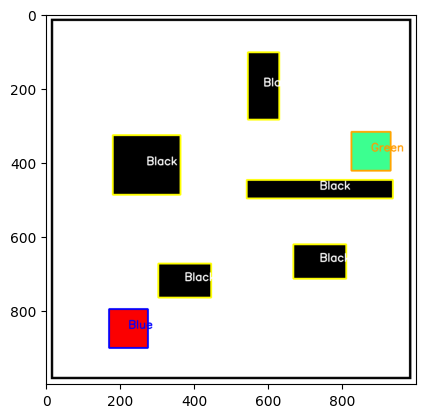

In [50]:
#Next to each square or rectangle, we will write the label of the square or rectangle inside the square or rectangle
def write_colour_label(image, coordinates, color):
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    color_text_map = {
        'Black': (255, 255, 255),   # White text for Black contour
        'Green': (0, 155, 255),     # Orange text for Green contour 
        'Blue' : (255, 0, 0),       # Yellow text for Blue contour
    }

    text_color = color_text_map.get(color, (255, 255, 255))  # Default to white if no mapping found

    for coord in coordinates:
        if len(coord) == 1:
            x, y = coord[0]  # Extract x and y from the single coordinate
        else:
            x, y = coord  # Extract x and y from the tuple
        cv2.putText(image, color, (x, y), font, 1, text_color, 2, cv2.LINE_AA)

    return image


# Write text for blue squares
image = write_colour_label(image, blue_coordinates, 'Blue')

# Write text for green squares
image = write_colour_label(image, green_coordinates, 'Green')

# Write text for black rectangles
image = write_colour_label(image, black_coordinates, 'Black')

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [47]:
# Convert lists to tuples after sorting
blue_coordinates = [tuple(coord) for coord in blue_coordinates]
green_coordinates = [tuple(coord) for coord in green_coordinates]
black_coordinates = [tuple(coord) for coord in black_coordinates]

Measurement noise matrix : x position and y position of the thymio is there is 

## Displaying the video

## Filtering